### Predict sentiment of politicians texts using Sentiment Analysis model

In [36]:
import pickle
import glob2
import re
from matplotlib import pyplot as plt
import pandas as pd

# Loading pretrained model by the script in eda_sentiment-analysis-model
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

model = load_model('../models/sentiment-analysis-model/finalsentimentmodel.h5')
model.summary()

with open('../models/sentiment-analysis-model/finalwordindex.pkl', 'rb') as picklefile:
    word_index = pickle.load(picklefile)
top_words = len(word_index)
tokenizer = Tokenizer(num_words=top_words)
tokenizer.word_index = word_index

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         212313200 
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 212,430,835
Trainable params: 117,635
Non-trainable params: 212,313,200
_________________________________________________________________


In [46]:
# function used to the result of sentiment analsyis for each party
def get_sentiment_analysis(party):
    # create dataframe
    df_mean = pd.DataFrame(columns=["Name", "Positive", "Negative"])
    # take oll filenames of politicians from the party
    filenames_of_parties = glob2.glob(f'../data/sejm_speeches_sorted_parties/{str(party)}/*.txt')

    # extract names of all politicians
    names = [re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]', file)[-2] for file in filenames_of_parties]

    for i, file in enumerate(filenames_of_parties):
        
        df = pd.DataFrame(columns=['Positive', 'Negative'])
        # get all spechess of current politician
        speaches = open(file, 'r', encoding="utf=8").readlines()

        for idx, speach in enumerate(speaches):
            # tokenize the text  and convert ot the numerical vector
            text = [speach]
            test_sequences = tokenizer.texts_to_sequences(text)
            x_test = pad_sequences(test_sequences, maxlen=40)
            # predict the results and save in the dataframe
            result = model.predict(x_test)
            df.loc[idx] = [result[:, 1] * 100, result[:, 2] * 100]
        #return average of the sentiment for Positive and Negative for each person
        df_mean.loc[i] = [names[i], df["Positive"].mean().tolist()[0], df["Negative"].mean().tolist()[0]]

    return df_mean

In [88]:
# function for ploting bar chart
def plot_bar_chart(df,party):
    names = df.iloc[:, 0].tolist()
    positives =[]
    negatives =[]
    for name in names:
        positives.append(df[df["Name"]== name]["Positive"].tolist()[0])
        negatives.append(100)

    plt.figure(figsize=(10, 5))

    ax1 = plt.subplot()
    ax1.bar(names, negatives, alpha=1, color="#ff9999", label="Negative")
    ax1.bar(names, positives, alpha=1, color="#99ff99", label="Positive")
    plt.title(str(party))
    plt.xticks(rotation=90)
    ax1.legend()

In [79]:
# calculate sentiment analysis for members for each party
parties = ['konfederacja','pis','po']
parties_data = []

for party in parties:
    parties_data.append(get_sentiment_analysis(party))

1/1 [==============================] - 0s 24ms/step


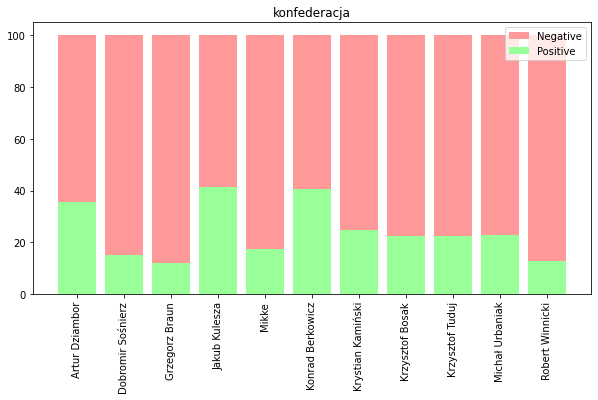

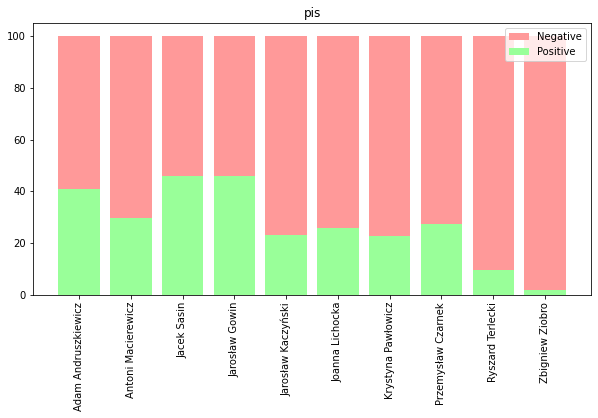

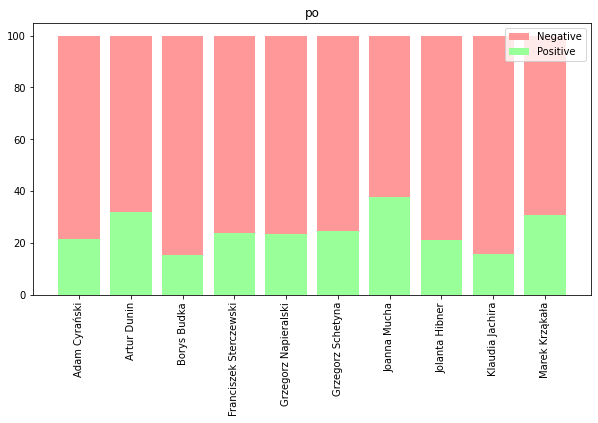

In [89]:
# Select the most popular politicians for pis an po (we are getting all from konfederacja)
popular_pis=['Jacek Sasin','Jarosław Kaczyński','Krystyna Pawłowicz','Ryszard Terlecki','Zbigniew Ziobro','Beata Szydło','Przemysław Czarnek','Antoni Macierewicz','Jarosław Gowin','Adam Andruszkiewicz','Joanna Lichocka']
popular_po=['Borys Budka','Grzegorz Schetyna','Klaudia Jachira','Franciszek Sterczewski','Joanna Mucha','Adam Cyrański','Grzegorz Napieralski','Jolanta Hibner','Marek Krząkała','Bartłomiej  Sienkiewicz','Artur Dunin']

for party in parties:
    if party == 'konfederacja':
        plot_bar_chart(parties_data[0],parties[0])
    if party == 'pis':
        plot_bar_chart(parties_data[1][parties_data[1]['Name'].isin(popular_pis)],parties[1])
    if party == 'po':
        plot_bar_chart(parties_data[2][parties_data[2]['Name'].isin(popular_po)], parties[2])

In [94]:
# function used to plot pie chart for party
def get_pie_chart(df,party):
    labels = ["Positive","Negative"]
    biases = [df["Positive"].mean().tolist(), df["Negative"].mean().tolist()]
    colors = ['#99ff99', '#ff9999']

    fig1, ax1 = plt.subplots()
    ax1.pie(biases, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    plt.title(str(party))
    plt.show()

In [93]:
print(parties_data[0])

                 Name   Positive   Negative
0      Artur Dziambor  35.669518  64.330460
1   Dobromir Sośnierz  15.073843  84.926147
2      Grzegorz Braun  12.103044  87.896912
3       Jakub Kulesza  41.452271  58.547726
4               Mikke  17.491159  82.508842
5    Konrad Berkowicz  40.422440  59.577564
6   Krystian Kamiński  24.743454  75.256546
7     Krzysztof Bosak  22.400492  77.599503
8     Krzysztof Tuduj  22.337624  77.662369
9     Michał Urbaniak  22.840601  77.159401
10    Robert Winnicki  12.879251  87.120750


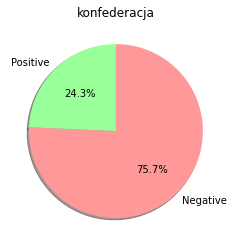

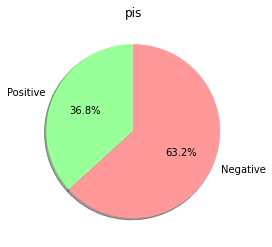

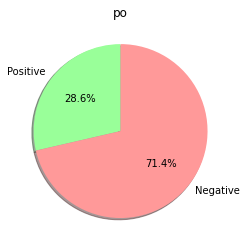

In [95]:
for idx,party in enumerate(parties_data):
    get_pie_chart(party,parties[idx])